In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
path = '.'

#  Sales(판매량) 상위 스토어

Q1. Quito 지역 스토어 중 가장 판매량이 잘 나오는 스토어는 어디인가요? 

Q2. 매출 잘 나오는 상위 Top5의 2016년 판매량 추이 (그래프)

In [2]:
# 데이터 로드
train = pd.read_csv(f'{path}/train_quito.csv')

# 파생변수 생성
train['날짜'] = pd.to_datetime(train['날짜'])
train['연도'] = train['날짜'].dt.year.astype(str)
train['월'] = train['날짜'].dt.month.astype(str)
train['연월'] = train['연도'] + '-' + train['월']

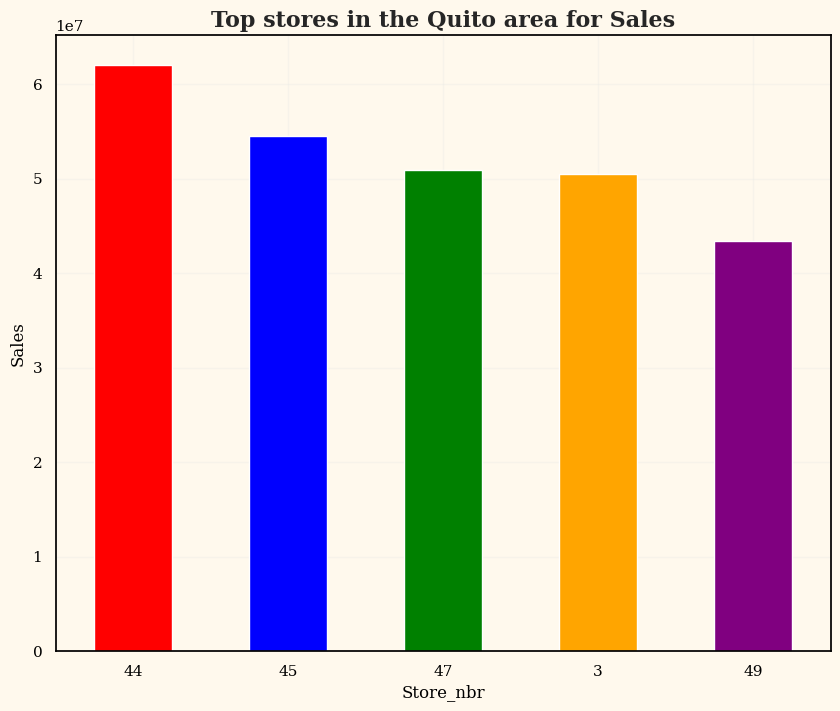

In [3]:
# 2013~2017년도 매장별 판매량
전연도_판매량 = []
for year in train['연도'].drop_duplicates().to_list():
    x = train[train['연도'] == year].groupby(['연도','매장번호']).agg({'판매량':'sum'})
    전연도_판매량.append(x.reset_index())

# 데이터프레임 병합
전연도_판매량 = pd.concat(전연도_판매량, axis=0, ignore_index=True)

# 시각화
rc = {
    "axes.facecolor": "#FFF9ED",
    "figure.facecolor": "#FFF9ED",
    "axes.edgecolor": "#000000",
    "grid.color": "#EBEBE7",
    "font.family": "serif",
    "axes.labelcolor": "#000000",
    "xtick.color": "#000000",
    "ytick.color": "#000000",
    "grid.alpha": 0.4
}
sns.set(rc=rc)

판매량_상위매장_Top5 = 전연도_판매량.groupby(['매장번호']).agg({'판매량':'sum'}).reset_index().nlargest(5,'판매량')
판매량_상위매장_Top5.plot(kind='bar', x='매장번호',
                           y='판매량',color=['red', 'blue', 'green', 'orange', 'purple'],
                          figsize=(10,8))

plt.title('Top stores in the Quito area for Sales', fontweight='bold', fontsize=16)
plt.xlabel('Store_nbr')
plt.ylabel('Sales')
plt.xticks(rotation=0)
plt.legend().remove()
plt.show()

## Sales(판매량) 상위 스토어 => 2016년 추이

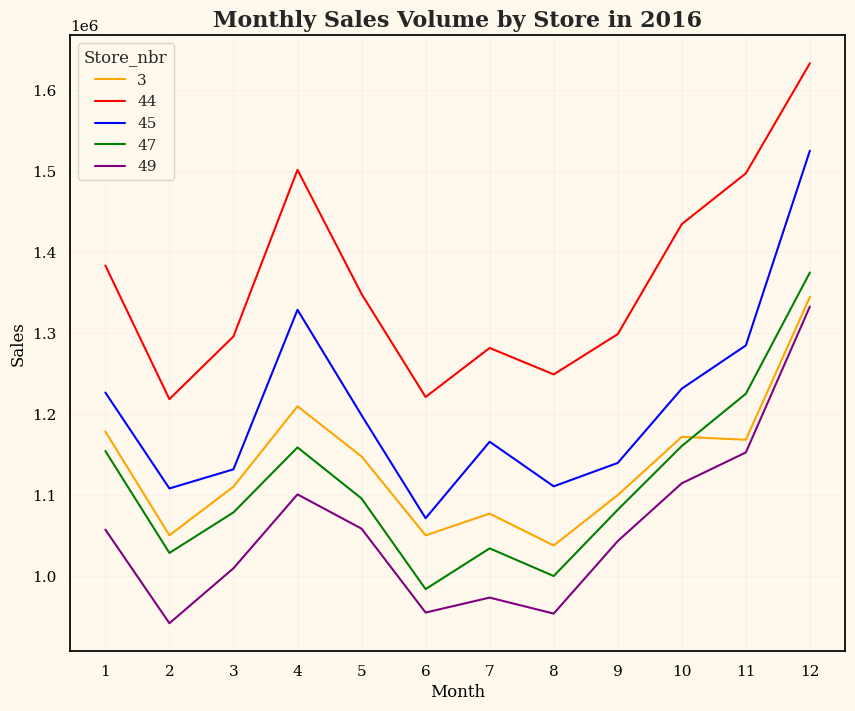

In [4]:
# 2016년 -> 월별/매장별 판매량
매장별_판매량 = []
for month in train['월'].drop_duplicates().to_list():
    x = train[train['월'] == month].groupby(['연도','월','매장번호']).agg({'판매량':'sum'})
    매장별_판매량.append(x.reset_index())

# 데이터프레임 병합
매장별_판매량 = pd.concat(매장별_판매량, axis=0, ignore_index=True)

# 2016년 한 해동안 판매량 상위 매장들의 판매량 추이
_2016_판매량_상위매장 = 매장별_판매량.loc[(매장별_판매량['연도']=='2016') & (매장별_판매량['매장번호'].isin([3,44,45,47,49]))]

# 시각화
rc = {
    "axes.facecolor": "#FFF9ED",
    "figure.facecolor": "#FFF9ED",
    "axes.edgecolor": "#000000",
    "grid.color": "#EBEBE7",
    "font.family": "serif",
    "axes.labelcolor": "#000000",
    "xtick.color": "#000000",
    "ytick.color": "#000000",
    "grid.alpha": 0.4
}
sns.set(rc=rc)
plt.figure(figsize=(10,8))
colors = ['orange', 'red', 'blue', 'green', 'purple']

sns.lineplot(data=_2016_판매량_상위매장[['월','매장번호','판매량']],
            x='월',y='판매량',
            hue='매장번호',palette=colors
            )

plt.title("Monthly Sales Volume by Store in 2016", fontweight='bold', fontsize=16 )
plt.xlabel('Month')
plt.ylabel('Sales')
plt.legend(title='Store_nbr')

# Transactions(거래건수) 상위 스토어

Q1. 최근 1년간 거래건수가 가장 많았던 스토어는 어디인가요?

Q2. 거래건수 많은 스토어들의 2016년 거래건수 추이

In [5]:
# 데이터 로드
transactions = pd.read_csv(f'{path}/transactions.csv')

# 컬럼명 지정
transactions =transactions.rename(columns={'date':'날짜',
                            'store_nbr':'매장번호',
                            'transactions':'거래건수'})

# 'Quito'지역의 거래건수 만 가져오기 & 파생변수 생성
trans_quito = transactions.loc[transactions['매장번호'].isin(train['매장번호'].drop_duplicates().to_list())]
trans_quito['날짜'] = pd.to_datetime(trans_quito['날짜'])
trans_quito['연도'] = trans_quito['날짜'].dt.year.astype(str)
trans_quito['월'] = trans_quito['날짜'].dt.month.astype(str)
trans_quito['연월'] = trans_quito['연도'] + '-' + trans_quito['월']

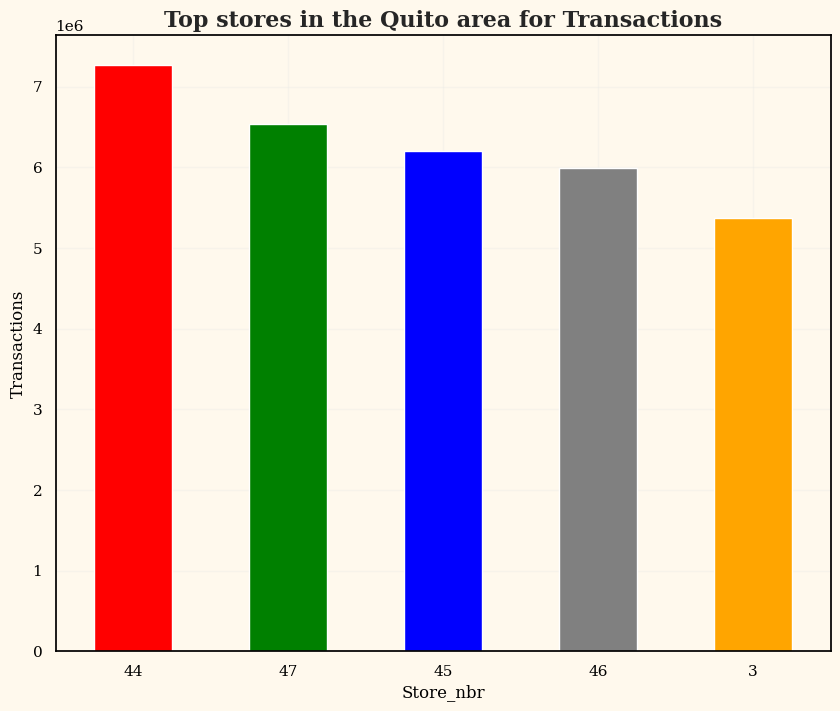

In [6]:
# 2013~2017년도 매장별 거래건수
전연도_거래건수 = []
for year in trans_quito['연도'].drop_duplicates().to_list():
    x = trans_quito[trans_quito['연도'] == year].groupby(['연도','매장번호']).agg({'거래건수':'sum'})
    전연도_거래건수.append(x.reset_index())

# 데이터프레임 병합
전연도_거래건수 = pd.concat(전연도_거래건수, axis=0, ignore_index=True)

# 시각화
rc = {
    "axes.facecolor": "#FFF9ED",
    "figure.facecolor": "#FFF9ED",
    "axes.edgecolor": "#000000",
    "grid.color": "#EBEBE7",
    "font.family": "serif",
    "axes.labelcolor": "#000000",
    "xtick.color": "#000000",
    "ytick.color": "#000000",
    "grid.alpha": 0.4
}

sns.set(rc=rc)

거래건수_상위매장_Top5 = 전연도_거래건수.groupby(['매장번호']).agg({'거래건수':'sum'}).reset_index().nlargest(5,'거래건수')
거래건수_상위매장_Top5.plot(kind='bar', x='매장번호',
                           y='거래건수',color=['red', 'green', 'blue', 'gray', 'orange'],
                          figsize=(10,8))

plt.title('Top stores in the Quito area for Transactions', fontweight='bold', fontsize=16 )
plt.xlabel('Store_nbr')
plt.ylabel('Transactions')
plt.xticks(rotation=0)
plt.legend().remove()
plt.show()

## Transactions(거래건수) 상위 스토어 => 2016년 추이

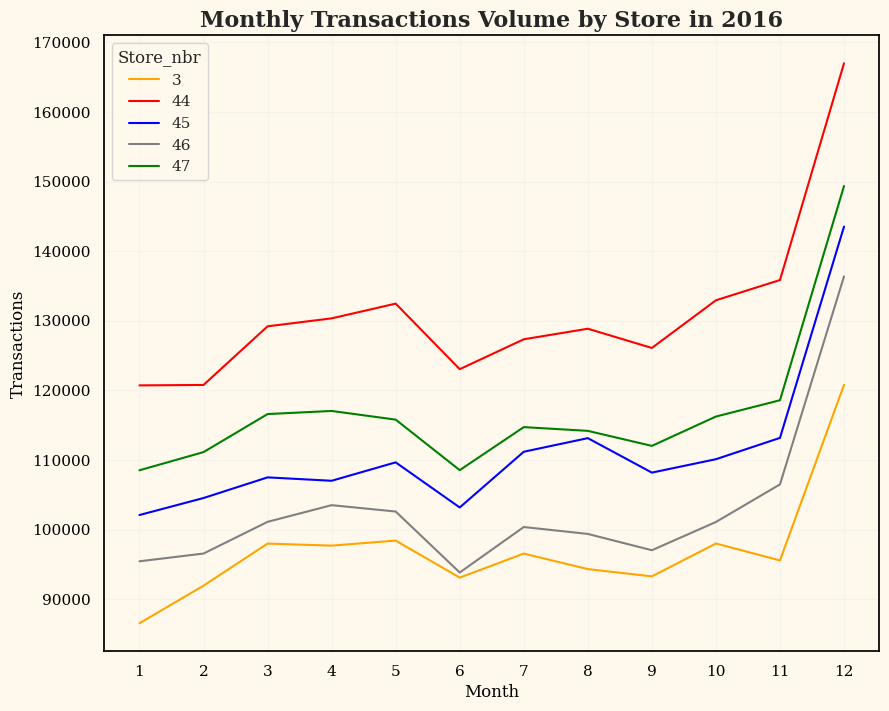

In [7]:
# 2016년 -> 월별/매장별 거래건수
매장별_거래건수 = []
for month in trans_quito['월'].drop_duplicates().to_list():
    x = trans_quito[trans_quito['월'] == month].groupby(['연도','월','매장번호']).agg({'거래건수':'sum'})
    매장별_거래건수.append(x.reset_index())

# 데이터프레임 병합
매장별_거래건수 = pd.concat(매장별_거래건수, axis=0, ignore_index=True)

# 2016년 한 해동안 판매량 상위 매장들의 판매량 추이
_2016_거래건수_상위매장 = 매장별_거래건수.loc[(매장별_거래건수['연도']=='2016') & (매장별_거래건수['매장번호'].isin([3,44,45,46,47]))]



# 시각화
rc = {
    "axes.facecolor": "#FFF9ED",
    "figure.facecolor": "#FFF9ED",
    "axes.edgecolor": "#000000",
    "grid.color": "#EBEBE7",
    "font.family": "serif",
    "axes.labelcolor": "#000000",
    "xtick.color": "#000000",
    "ytick.color": "#000000",
    "grid.alpha": 0.4
}

sns.set(rc=rc)

plt.figure(figsize=(10,8))
colors = ['orange', 'red', 'blue', 'gray', 'green']

sns.lineplot(data=_2016_거래건수_상위매장[['월','매장번호','거래건수']],
            x='월',y='거래건수',
            hue='매장번호',palette=colors,
            )

plt.title("Monthly Transactions Volume by Store in 2016", fontweight='bold', fontsize=16)
plt.xlabel('Month')
plt.ylabel('Transactions')
plt.legend(title='Store_nbr')

# sales/transactions (판매량/거래건수) 

Q. (전체 기간 기준) 거래건수 대비 판매량이 높게 나오는 스토어는 어디인가요?

In [8]:
# 전연도 판매량 및 거래건수 데이터프레임 병합
거래건수_대비_판매량 = 전연도_판매량.merge(전연도_거래건수)

# '판매량/거래건수' 파생변수 생성
거래건수_대비_판매량['판매량/거래건수'] = 거래건수_대비_판매량['판매량']/거래건수_대비_판매량['거래건수']

# 매장번호 별 '판매량/거래건수'만 살펴보기
판매량_거래건수 = 거래건수_대비_판매량.groupby(['매장번호']).agg({'판매량/거래건수':'sum'}).sort_values(by='판매량/거래건수',
                                                                 ascending=False).reset_index()

Text(0, 0.5, 'Sales/Transactions')

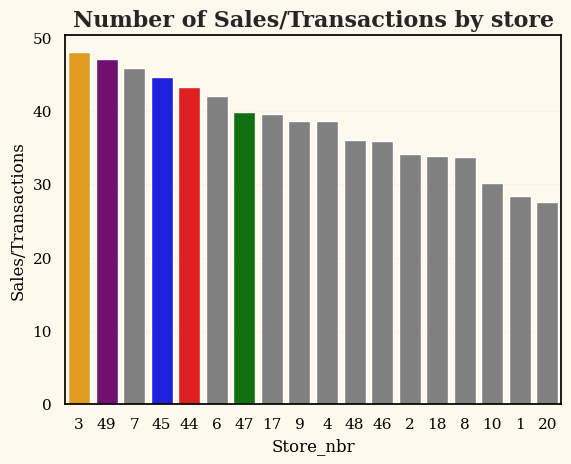

In [9]:
# 시각화
rc = {
    "axes.facecolor": "#FFF9ED",
    "figure.facecolor": "#FFF9ED",
    "axes.edgecolor": "#000000",
    "grid.color": "#EBEBE7",
    "font.family": "serif",
    "axes.labelcolor": "#000000",
    "xtick.color": "#000000",
    "ytick.color": "#000000",
    "grid.alpha": 0.4
}

sns.set(rc=rc)


colors= 판매량_거래건수['매장번호'].map({3:'orange', 44: 'red', 46: 'gray', 
                                  45: 'blue', 49 :'purple',47 :'green',7 :'gray',6 :'gray',
                                 17 :'gray',9 :'gray',48 :'gray',2 :'gray',18 :'gray', 8 :'gray',
                                 10 :'gray',1 :'gray',20 :'gray', 4:'gray'})


sns.barplot(data = 판매량_거래건수,
            x = '매장번호',
            y =  '판매량/거래건수',
            order = 판매량_거래건수['매장번호'],
            palette = colors)

plt.title('Number of Sales/Transactions by store', fontweight='bold', fontsize=16)
plt.xlabel('Store_nbr')
plt.ylabel('Sales/Transactions')
